# Ejemplo 6-1

![Problema5-2](images/5-3.png)

Recuerde el ejemplo 5-3, donde se presentó un estudio del efecto del porcentaje de carbonatación, la pre-
sión de operación y la velocidad de línea sobre la altura de llenado de una bebida carbonatada. Suponga
que sólo se usan dos niveles de carbonatación, de tal modo que el experimento es un diseño factorial $2^3$
con dos réplicas. Los datos (es decir, las desviaciones de la altura de llenado de especificación) se muestran en la tabla 6-4, y en la figura 6-6 se presenta la representación geométrica del diseño.

![Problema5-2](images/tabla6-4.png)

![Problema5-2](images/diseño6-6.png)

In [6]:
rm(list = ls())
Datos <- c(-3,-1,-1,1,
           -1,0,0,1,
           0,2,2,6,
           1,1,3,5)
A <- as.factor(c(rep(c("0","1"),each=8)))
B <- as.factor(rep(c("0", "0", "1", "1"),4))
C <- as.factor(rep(c("0", "1"),8))
Tabla <- data.frame(matrix(Datos, ncol=4, byrow=TRUE))

summary(Datos)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -3.00   -0.25    1.00    1.00    2.00    6.00 

In [7]:
alpha <- 0.05
a<-2
b<-2
c<-2
n<-2

anova <- aov(Datos~A+B+C+A*B+A*C+B*C+A*B*C)
summary(anova)
F005 <- qf(p=alpha, df1=(a-1)*(b-1), df2=a*b*(n-1), lower.tail=FALSE)
print(paste0("F_0.05 AB: ", F005))
if (F005>summary(anova)[[1]][3,4]) {
    print("F0<F005. Se acepta la hipótesis nula.")
} else {
    print("F0>=F005. Se rechaza la hipótesis nula.")
}

            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1  36.00   36.00    57.6 6.37e-05 ***
B            1  20.25   20.25    32.4 0.000459 ***
C            1  12.25   12.25    19.6 0.002205 ** 
A:B          1   2.25    2.25     3.6 0.094350 .  
A:C          1   0.25    0.25     0.4 0.544737    
B:C          1   1.00    1.00     1.6 0.241504    
A:B:C        1   1.00    1.00     1.6 0.241504    
Residuals    8   5.00    0.63                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "F_0.05 AB: 7.70864742217679"
[1] "F0>=F005. Se rechaza la hipótesis nula."


In [8]:
Datos.lm<-lm(Datos~A+B+C+A:B)
summary(Datos.lm)
Datos.lm


Call:
lm(formula = Datos ~ A + B + C + A:B)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1250 -0.4375 -0.1250  0.4375  1.1250 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.1250     0.4538  -4.682 0.000669 ***
A1            2.2500     0.5741   3.919 0.002395 ** 
B1            1.5000     0.5741   2.613 0.024130 *  
C1            1.7500     0.4059   4.311 0.001233 ** 
A1:B1         1.5000     0.8118   1.848 0.091700 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8118 on 11 degrees of freedom
Multiple R-squared:  0.9071,	Adjusted R-squared:  0.8733 
F-statistic: 26.84 on 4 and 11 DF,  p-value: 1.267e-05



Call:
lm(formula = Datos ~ A + B + C + A:B)

Coefficients:
(Intercept)           A1           B1           C1        A1:B1  
     -2.125        2.250        1.500        1.750        1.500  


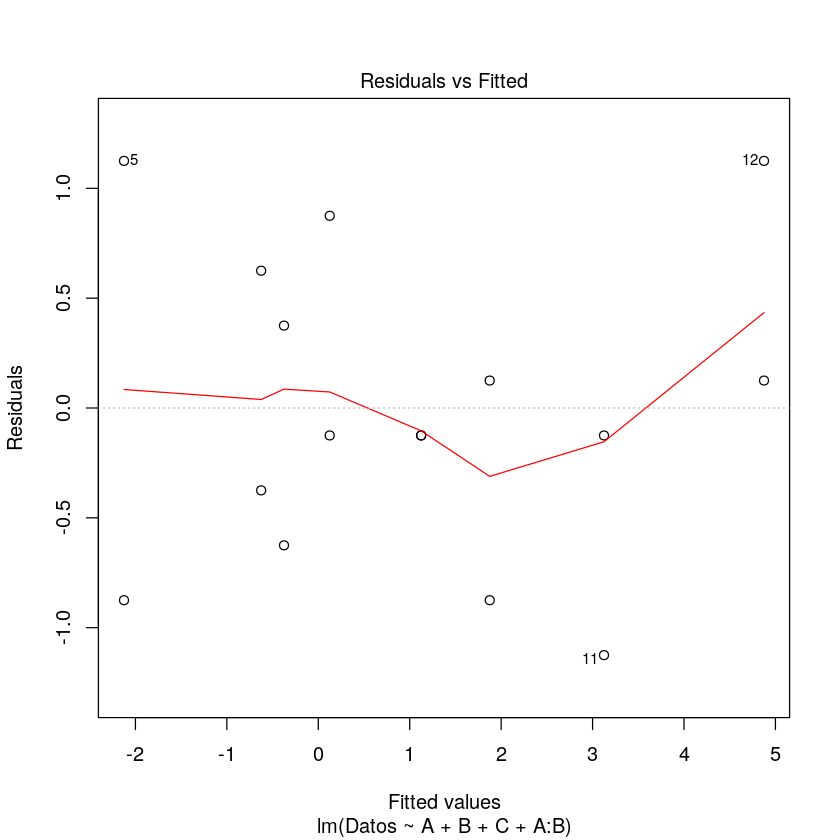

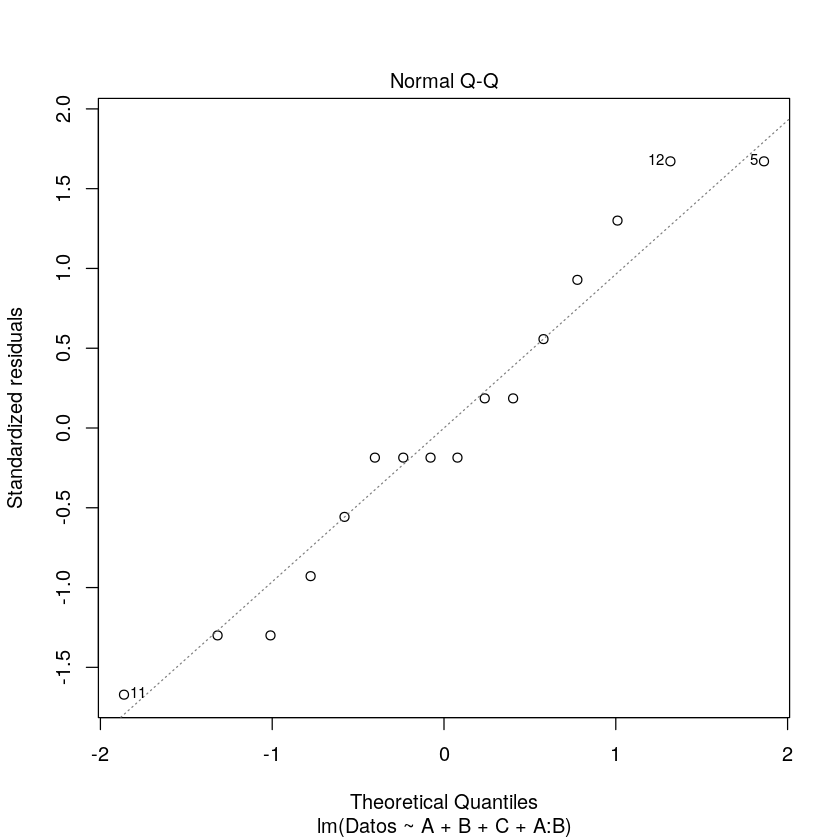

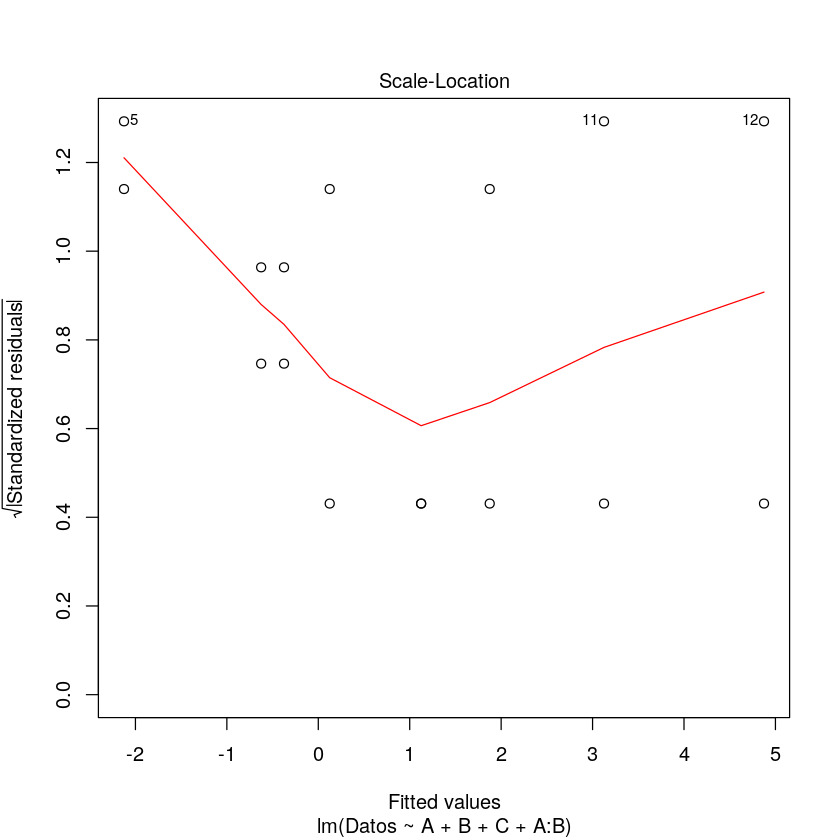

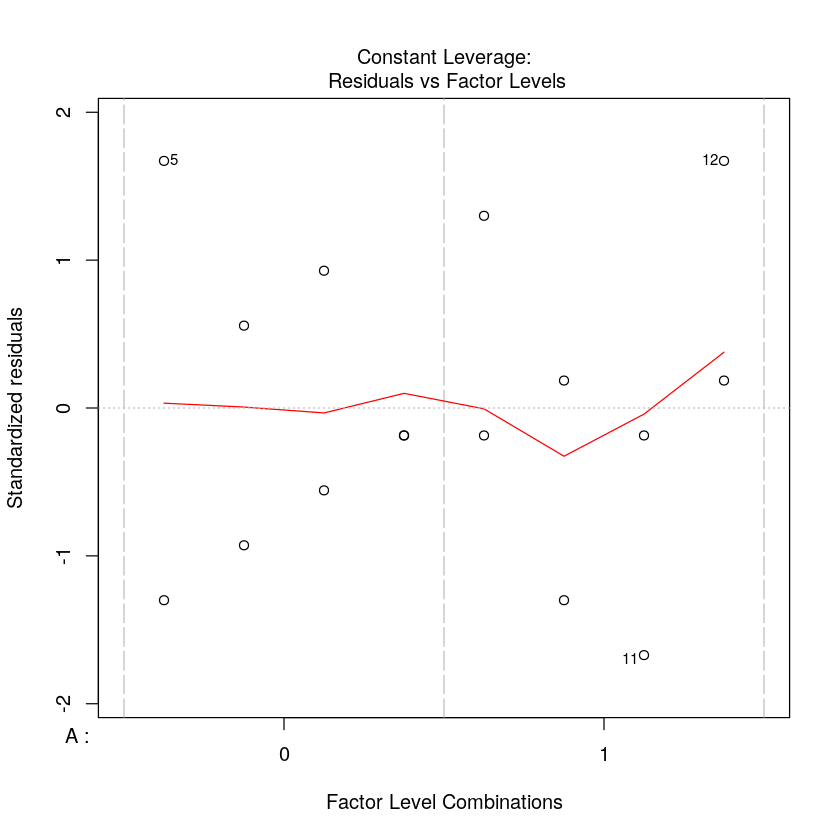

In [9]:
plot(Datos.lm)

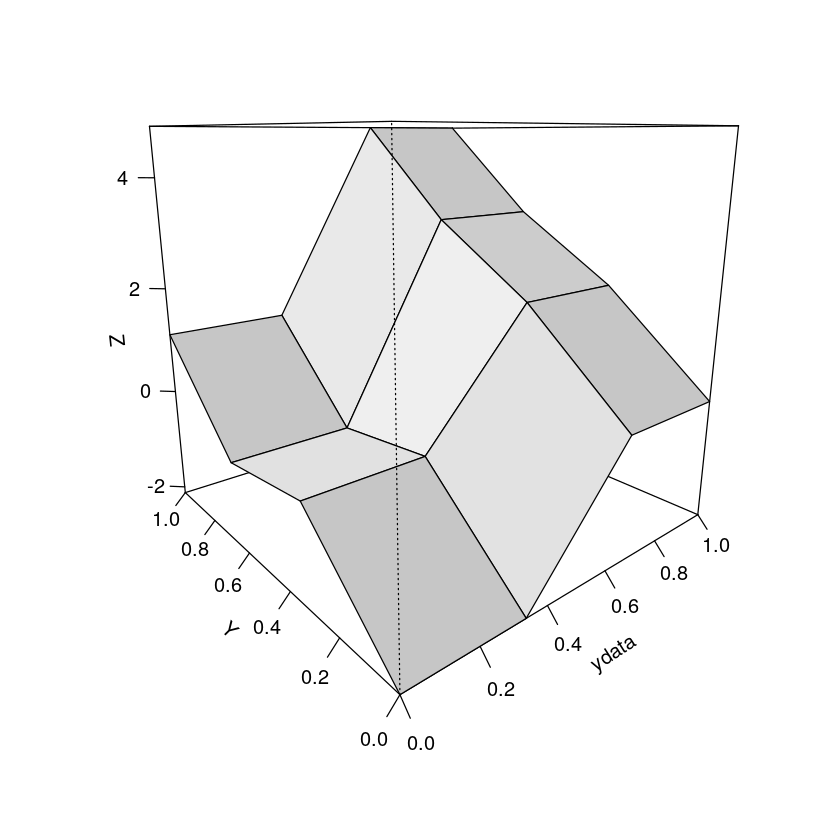

In [33]:
a<-rep((0:3),4)
b<-rep((0:3),each=4)
c<-rep(c(0),16)
xdata<-data.frame(t(rbind(a/4,b/4)))
ydata <- matrix(predict(Datos.lm,xdata), ncol=4, byrow=TRUE)
persp(ydata,theta=-40,ticktype="detailed",shade=0.2)

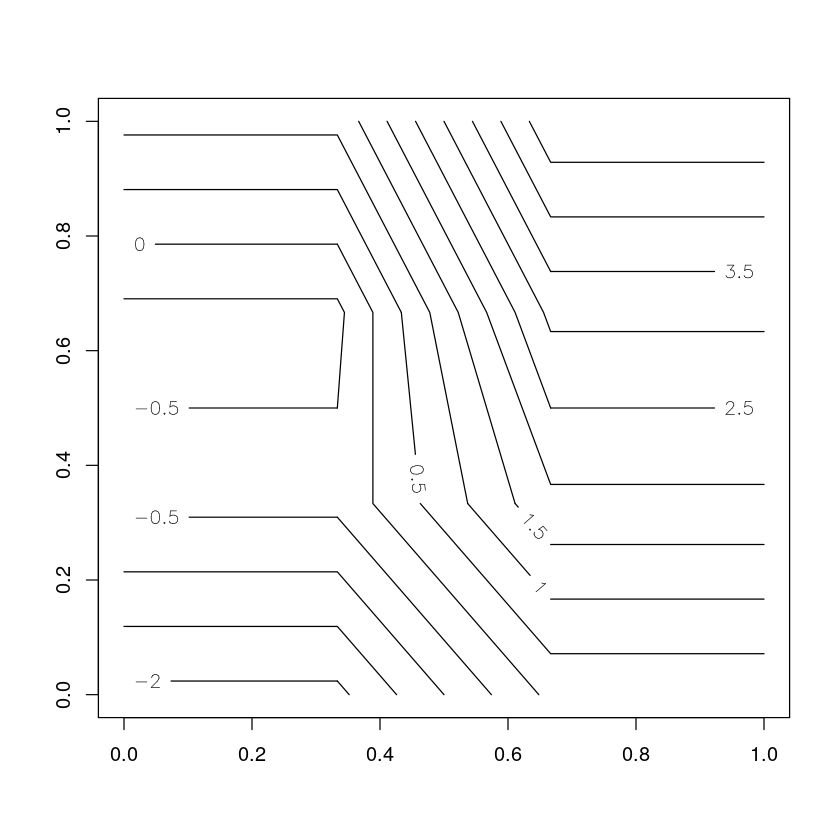

In [50]:
contour(ydata, labcex = 1, drawlabels=TRUE)

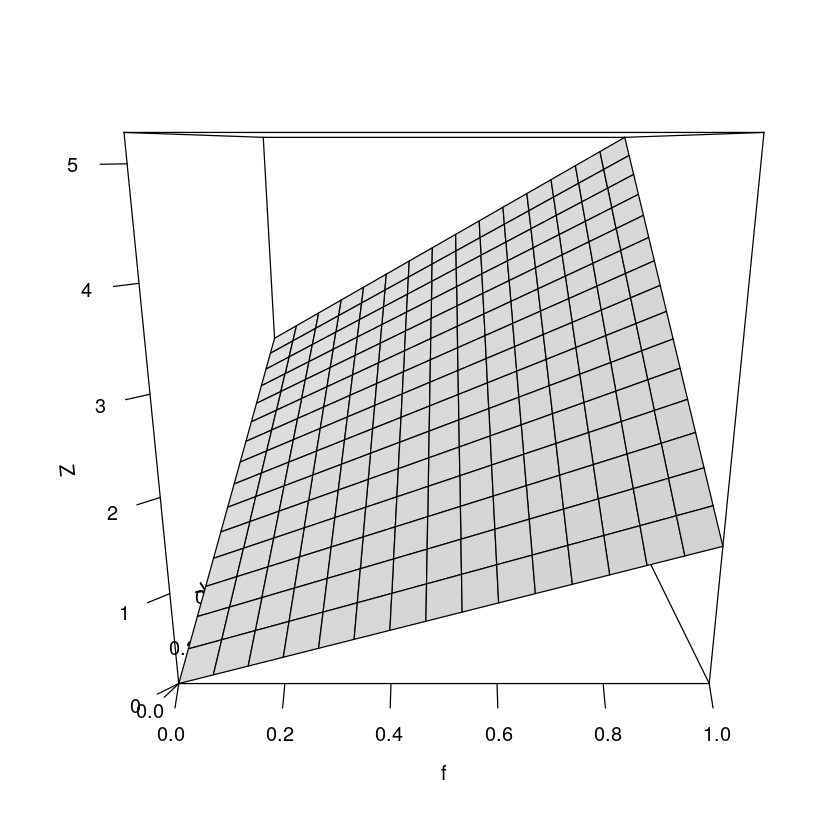

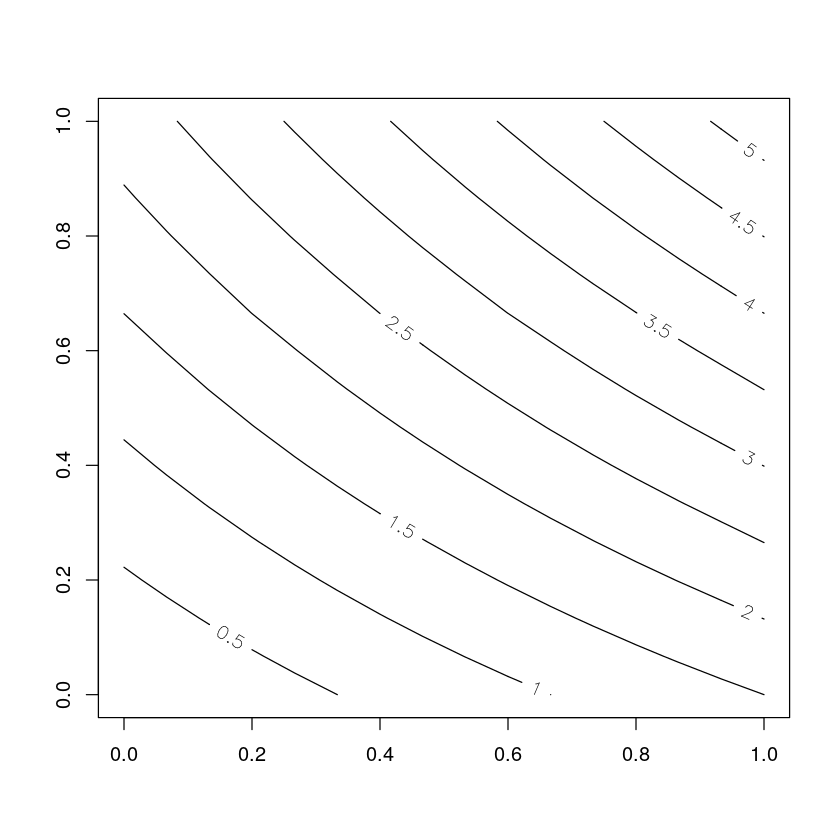

In [94]:
a<-rep((0:15),16)
b<-rep((0:15),each=16)
c<-rep(c(0),256)
f<-matrix(coef(Datos.lm)[2]*(a/15) + coef(Datos.lm)[3]*(b/15) + coef(Datos.lm)[4]*c + coef(Datos.lm)[5]*(a/15)*(b/15), ncol=16, byrow=TRUE)
persp(f,ticktype="detailed",shade=0.2)
contour(f, labcex = 1, drawlabels=TRUE)